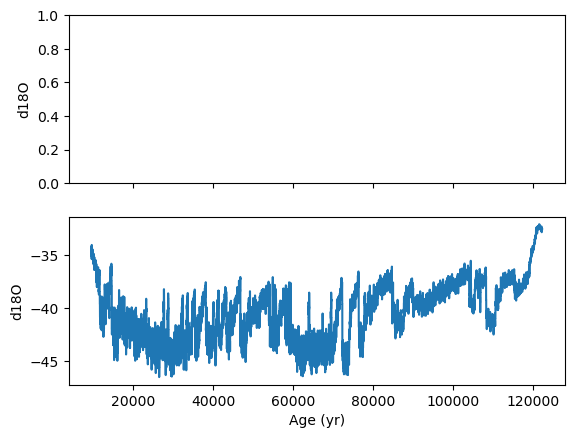

Antarctic Fivecore:
Start age:  0
End age:  61000
NGRIP:
Start age:  9540
End age:  122280


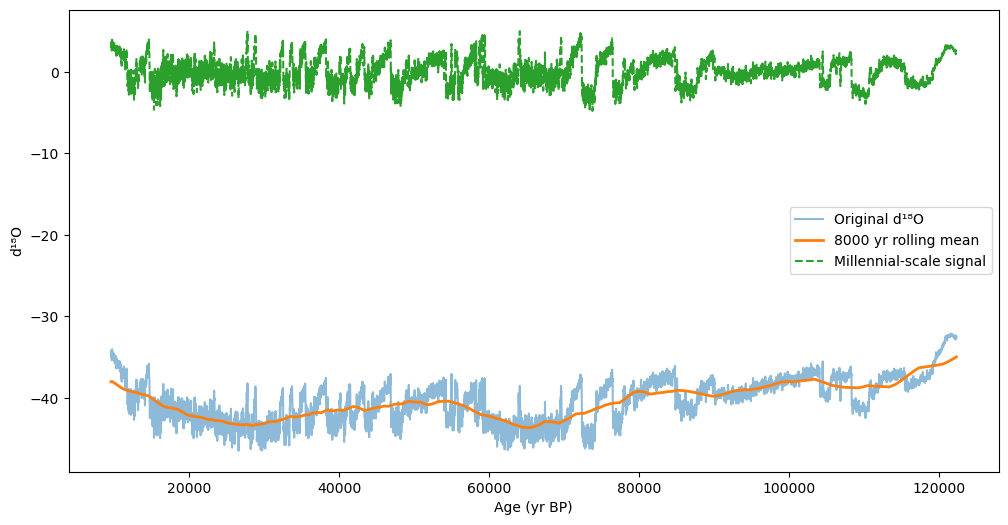

    age   d18O   smoothed    signal
0  9540 -34.24 -38.040320  3.800320
1  9560 -34.24 -38.032709  3.792709
2  9580 -35.02 -38.025198  3.005198
3  9600 -35.02 -38.021028  3.001028
4  9620 -34.55 -38.012362  3.462362
           age       pre
1000       0.0  0.016280
999      100.0  0.016431
998      200.0  0.016568
997      300.0  0.016690
996      400.0  0.016798
...        ...       ...
4      99600.0  0.003828
3      99700.0  0.002715
2      99800.0  0.001597
1      99900.0  0.000475
0     100000.0 -0.000650

[1001 rows x 2 columns]
         age       pre
904   9600.0 -0.016466
903   9700.0 -0.016759
902   9800.0 -0.017041
901   9900.0 -0.017310
900  10000.0 -0.017566
          age       pre
904  112680.0 -0.016466
903  112580.0 -0.016759
902  112480.0 -0.017041
901  112380.0 -0.017310
900  112280.0 -0.017566


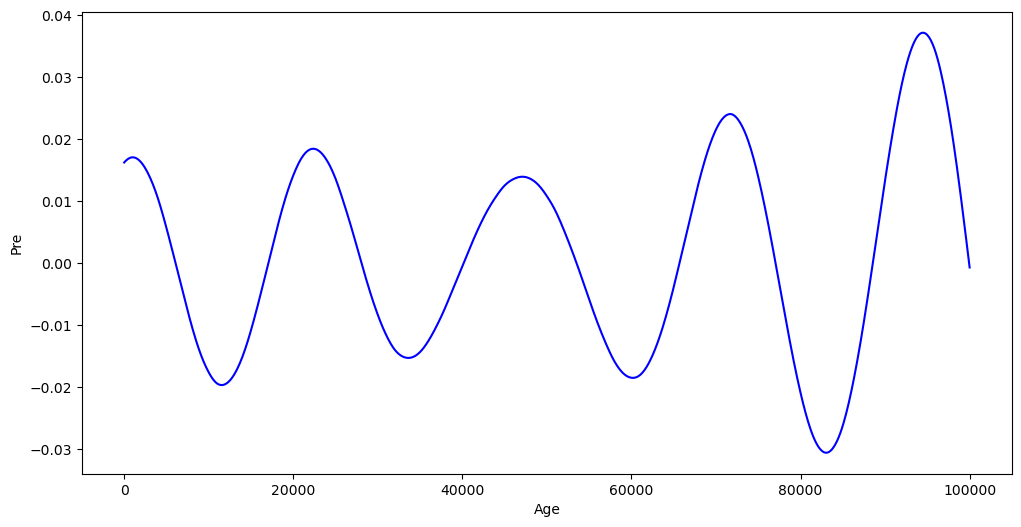

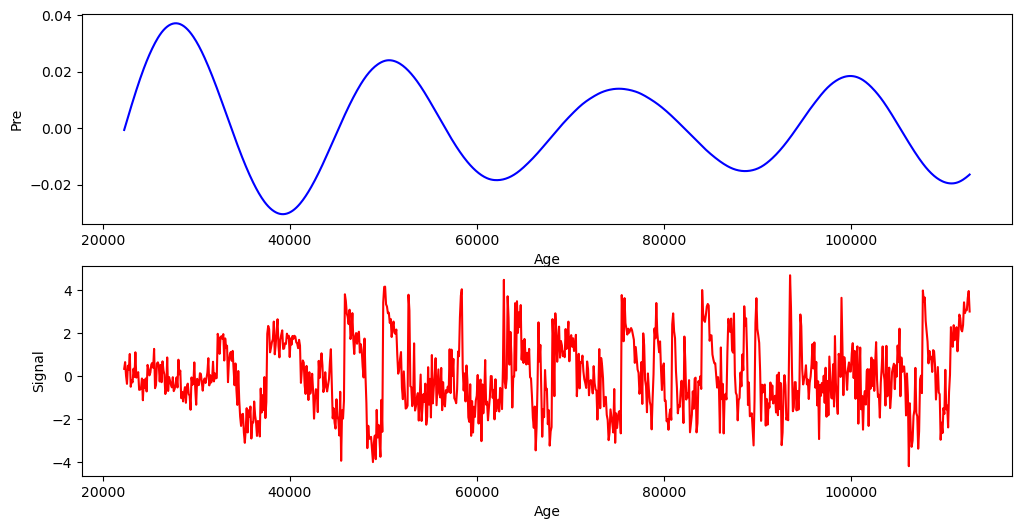

In [31]:
import pandas as pd


path = "D:/VScode/bipolar_seesaw_CCM/ice_core_data/Ant_Gre.xlsx"

# Loading the sheets Antarctic_Fivecore and NGRIP
df_ant = pd.read_excel(path, sheet_name="Antarctic_Fivecore")
df_ngrip = pd.read_excel(path, sheet_name="NGRIP")


import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, sharex=True)
# axs[0].plot(df_ant["age"], df_ant["d18O"], label="Antarctic Fivecore")
axs[1].plot(df_ngrip["age"], df_ngrip["d18O"], label="NGRIP")
axs[0].set_ylabel("d18O")
axs[1].set_xlabel("Age (yr)")
axs[1].set_ylabel("d18O")
plt.show()

# print the start and end age of both data
print("Antarctic Fivecore:")
print("Start age: ", df_ant["age"].min())
print("End age: ", df_ant["age"].max())
print("NGRIP:")
print("Start age: ", df_ngrip["age"].min())
print("End age: ", df_ngrip["age"].max())

# from age small to large, for the same age value in ngrip, remove the dupilcate
df_ngrip = df_ngrip.drop_duplicates("age", keep="first")
df_ngrip.info


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Make sure df_ngrip is sorted by age
df = df_ngrip.sort_values("age").reset_index(drop=True)

# 2) Compute rolling mean over an 8 000 yr window
#    (assumes ∆age ≈ 20 yr → window ≈ 8000/20 = 400 samples)
window = int(10000 / np.median(np.diff(df["age"])))
df["smoothed"] = df["d18O"].rolling(window=window, center=True, min_periods=1).mean()

# 3) Millennial‐scale signal = original minus low‐frequency
df["signal"] = df["d18O"] - df["smoothed"]

# 4) Plot to check
plt.figure(figsize=(12, 6))
plt.plot(df["age"], df["d18O"],       label="Original d¹⁸O",   alpha=0.5)
plt.plot(df["age"], df["smoothed"],   label=f"{8000} yr rolling mean", linewidth=2)
plt.plot(df["age"], df["signal"],     label="Millennial‐scale signal", linestyle="--")
# plt.gca().invert_xaxis()  # if age is “years before present”
plt.xlabel("Age (yr BP)")
plt.ylabel("d¹⁸O")
plt.legend()
plt.show()

# 5) (Optional) Inspect the first few rows
print(df[["age","d18O","smoothed","signal"]].head())





import pandas as pd
from scipy.interpolate import interp1d

# Read the file into a DataFrame
df_pre = pd.read_csv(
    r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre.txt", 
    sep='\s+',       # '\s+' means "split on any whitespace"
    header=None,     # or specify a row number if there's a header
    engine='python'
)


df_pre.iloc[:, 0] = df_pre.iloc[:, 0].abs() * 1000

# Reverse the DataFrame rows
df_pre = df_pre.iloc[::-1]
df_pre.columns = ['age', 'pre']

# plot df_pre
plt.figure(figsize=(12, 6))
plt.plot(df_pre.iloc[:, 0], df_pre.iloc[:, 1], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
print(df_pre)

# crop the df_pre between Start age:  9540 End age:  122280
df_pre = df_pre[(df_pre['age'] >= 9540) & (df_pre['age'] <= 122280)]

print(df_pre.head())

# # build an interpolator; use 'nearest' to preserve the step
f = interp1d(df['age'], df['signal'], kind='nearest',
             bounds_error=False,
             fill_value=1)            

interpolated_sq = f(df_pre['age'].values)



df_sd=pd.DataFrame({'age':df_pre['age'].values,'d18O':interpolated_sq})

df_pre['age']=df_pre['age'].values * -1 +122280
df_sd['age']=df_sd['age'].values * -1 +122280

print(df_pre.head())

# flip the two dfs upside down
df_pre = df_pre.iloc[::-1]
df_sd = df_sd.iloc[::-1]

# plot df_pre and df_sd in 2 by 1 subplots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df_pre.iloc[:, 0], df_pre.iloc[:, 1], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
plt.subplot(2, 1, 2)
plt.plot(df_sd['age'], df_sd['d18O'], label='signal', color='red')
plt.xlabel("Age")
plt.ylabel("Signal")
plt.show()


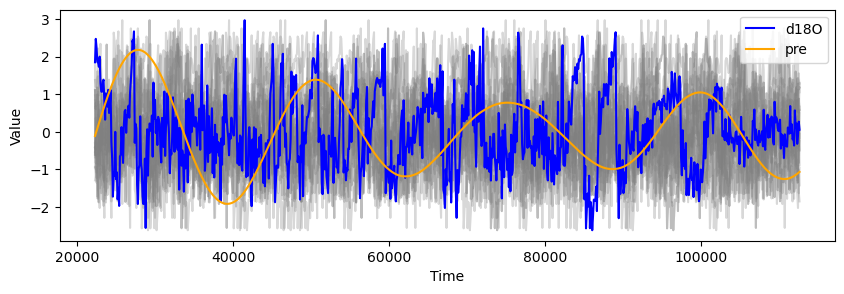

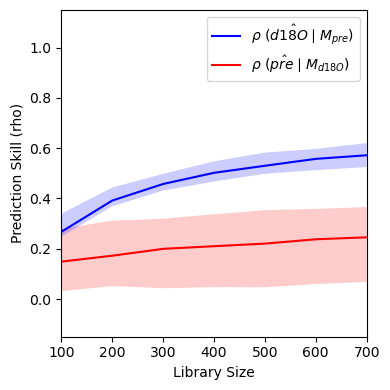

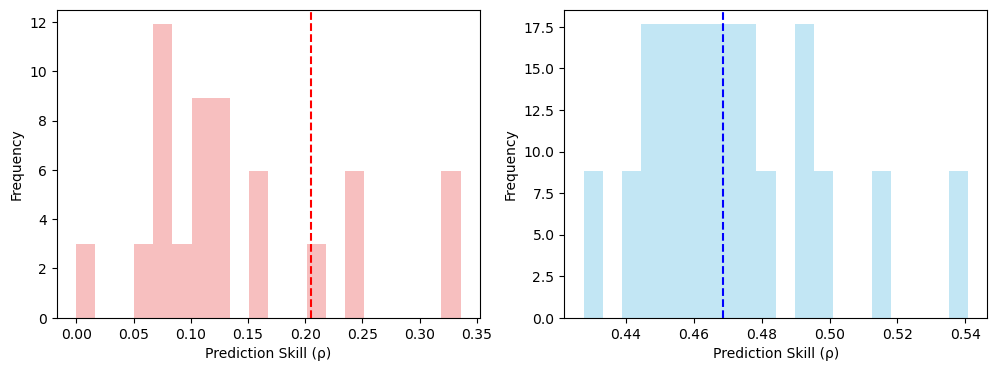

In [23]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    df_sd, 
    df_pre,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600 700",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)

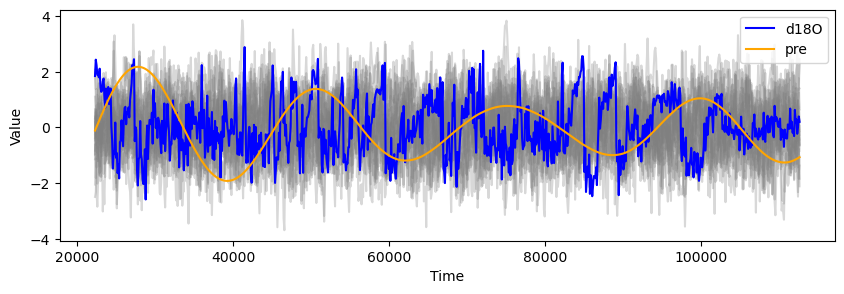

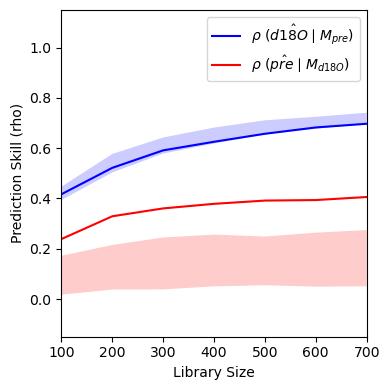

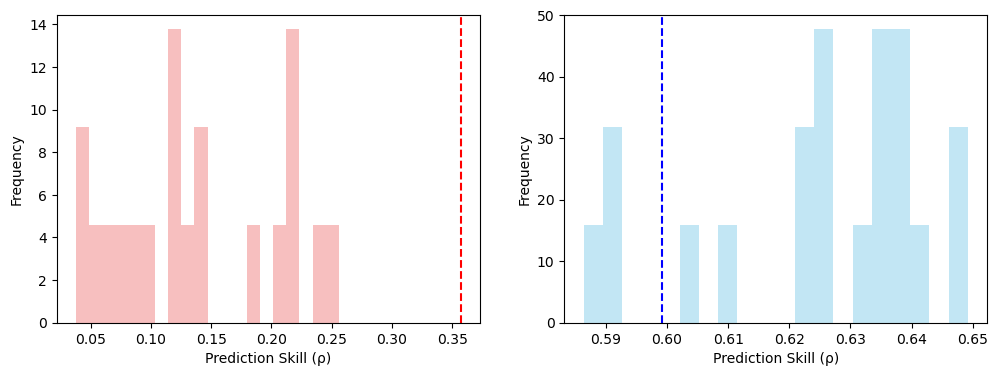

In [33]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v3(
    df_sd, 
    df_pre,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600 700",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)